# WaveBot MultiDirectional Waves

In [1]:
# logging
import logging
logging.basicConfig(level=logging.INFO)

# autograd (derivatives)
import autograd.numpy as np
from autograd.builtins import isinstance, tuple, list, dict

# other packages
import os

import capytaine as cpy
import matplotlib.pyplot as plt

# wecopttool
import wecopttool as wot

# create save directory
results_dir = 'results_reg_irreg_waves'
if not os.path.exists(results_dir):
  os.makedirs(results_dir)

In [2]:
# mesh
wb = wot.geom.WaveBot()  # use standard dimensions
mesh_size_factor = 0.5  # 1.0 for default, smaller to refine mesh
mesh = wb.mesh(mesh_size_factor)

# frequencies
f0 = 0.05
nfreq = 50

# regular wave - no direction
wfreq = 0.3
amplitude = 0.0625
phase = -40
waves_0 = wot.waves.regular_wave(f0, nfreq, wfreq, amplitude, phase)

# regular waves - directional 
direction = [15.0, 90] #direction in degrees
waves_reg_dir = wot.waves.regular_wave(f0, nfreq, wfreq, amplitude, phase, direction)


## Cases

In [3]:
fb_h = cpy.FloatingBody.from_meshio(mesh, name="WaveBot")
fb_h_reg_dir = cpy.FloatingBody.from_meshio(mesh, name="WaveBot")

# DOFs
fb_h.add_translation_dof(name="HEAVE")
fb_h_reg_dir.add_translation_dof(name="HEAVE")

# hydrostatics 
hs_data = wot.hydrostatics.hydrostatics(fb_h)

mass_33 = wot.hydrostatics.mass_matrix_constant_density(hs_data)[2, 2]

stiffness_33 = wot.hydrostatics.stiffness_matrix(hs_data)[2, 2]
mass_h = np.array([[mass_33]])

stiffness_h = np.array([[stiffness_33]])

# kinematics

kinematics_h = np.eye(fb_h.nb_dofs)

# PTO

names_h = ["PTO_HEAVE"]

pto_h = wot.pto.PseudoSpectralPTO(nfreq, kinematics_h, names=names_h)

# f_add 
f_add_h = pto_h.force_on_wec

# WEC

wec_h = wot.WEC(fb_h, mass_h, stiffness_h, f0, nfreq, f_add=f_add_h)
wec_h_reg_dir = wot.WEC(fb_h, mass_h, stiffness_h, f0, nfreq, f_add=f_add_h)

# BEM files

fname_h = os.path.join(results_dir, 'bem_h.nc')
fname_h_reg_dir = os.path.join(results_dir, 'bem_h_reg_dir.nc')


INFO:capytaine.bodies.bodies:Stored 1042 triangle faces as quadrilaterals
INFO:capytaine.bodies.bodies:New floating body: WaveBot.
INFO:capytaine.bodies.bodies:Stored 1042 triangle faces as quadrilaterals
INFO:capytaine.bodies.bodies:New floating body: WaveBot.
INFO:wecopttool.core:Changing value of 'f_add'. This might cause some attributes to be reset.
INFO:wecopttool.core:New WEC: WaveBot with 1 DOF.
INFO:wecopttool.core:Changing value of 'f_add'. This might cause some attributes to be reset.
INFO:wecopttool.core:New WEC: WaveBot with 1 DOF.


In [4]:
# # one time (run, comment out, restart & rerun notebook)


wec_h.run_bem()
wec_h.write_bem(fname_h)


INFO:wecopttool.core:Running Capytaine (BEM): 50 frequencies x 1 wave directions.
INFO:capytaine.bodies.bodies:Clipping WaveBot_immersed with respect to Plane(normal=[0. 0. 1.], point=[0. 0. 0.])
INFO:capytaine.bem.solver:Solve DiffractionProblem(body=WaveBot_immersed, omega=0.314, depth=inf, wave_direction=0.000, rho=1025.0).
INFO:capytaine.bem.solver:Solve RadiationProblem(body=WaveBot_immersed, omega=0.314, depth=inf, radiating_dof=HEAVE, rho=1025.0).
INFO:capytaine.bem.solver:Solve DiffractionProblem(body=WaveBot_immersed, omega=0.628, depth=inf, wave_direction=0.000, rho=1025.0).
INFO:capytaine.bem.solver:Solve RadiationProblem(body=WaveBot_immersed, omega=0.628, depth=inf, radiating_dof=HEAVE, rho=1025.0).
INFO:capytaine.bem.solver:Solve DiffractionProblem(body=WaveBot_immersed, omega=0.942, depth=inf, wave_direction=0.000, rho=1025.0).
INFO:capytaine.bem.solver:Solve RadiationProblem(body=WaveBot_immersed, omega=0.942, depth=inf, radiating_dof=HEAVE, rho=1025.0).
INFO:capytaine.

In [5]:
wave_dirs = [direction*np.pi/180] #list of directions in radian
wave_dirs

[0.2617993877991494]

In [6]:
wec_h_reg_dir.run_bem(wave_dirs)
wec_h_reg_dir.write_bem(fname_h_reg_dir)

INFO:wecopttool.core:Running Capytaine (BEM): 50 frequencies x 1 wave directions.
INFO:capytaine.bodies.bodies:Clipping WaveBot_immersed with respect to Plane(normal=[0. 0. 1.], point=[0. 0. 0.])
INFO:capytaine.bem.solver:Solve DiffractionProblem(body=WaveBot_immersed, omega=0.314, depth=inf, wave_direction=0.262, rho=1025.0).
INFO:capytaine.bem.solver:Solve RadiationProblem(body=WaveBot_immersed, omega=0.314, depth=inf, radiating_dof=HEAVE, rho=1025.0).
INFO:capytaine.bem.solver:Solve DiffractionProblem(body=WaveBot_immersed, omega=0.628, depth=inf, wave_direction=0.262, rho=1025.0).
INFO:capytaine.bem.solver:Solve RadiationProblem(body=WaveBot_immersed, omega=0.628, depth=inf, radiating_dof=HEAVE, rho=1025.0).
INFO:capytaine.bem.solver:Solve DiffractionProblem(body=WaveBot_immersed, omega=0.942, depth=inf, wave_direction=0.262, rho=1025.0).
INFO:capytaine.bem.solver:Solve RadiationProblem(body=WaveBot_immersed, omega=0.942, depth=inf, radiating_dof=HEAVE, rho=1025.0).
INFO:capytaine.

In [7]:
# Read BEM
# wec_sh_sh.read_bem(fname_sh)
# wec_sh_s.read_bem(fname_sh)
# wec_sh_h.read_bem(fname_sh)
# wec_s.read_bem(fname_s)
wec_h.read_bem(fname_h)
wec_h_reg_dir.read_bem(fname_h_reg_dir)

INFO:wecopttool.core:Reading BEM data from results_reg_irreg_waves\bem_h.nc.
INFO:wecopttool.core:Impedance matrix deleted. To calculate impedance call 'self.bem_calc_impedance()'
INFO:wecopttool.core:Impedance matrix deleted. To calculate impedance call 'self.bem_calc_impedance()'
INFO:wecopttool.core:Calculating impedance matrix.
INFO:capytaine.post_pro.impedance:Compute impedance.
INFO:wecopttool.core:Reading BEM data from results_reg_irreg_waves\bem_h_reg_dir.nc.
INFO:wecopttool.core:Impedance matrix deleted. To calculate impedance call 'self.bem_calc_impedance()'
INFO:wecopttool.core:Impedance matrix deleted. To calculate impedance call 'self.bem_calc_impedance()'
INFO:wecopttool.core:Calculating impedance matrix.
INFO:capytaine.post_pro.impedance:Compute impedance.


## Solve cases

In [12]:
# heave - initial regular wave
scale_x_wec = 10000
scale_x_opt = 1.0
scale_obj = 1.0

options = {'maxiter': 1000, 'ftol': 1e-8}

pto = pto_h  # change
wec = wec_h  # change

obj_fun = pto.average_power
nstate_opt = pto.nstate

wec_tdom, wec_fdom, x_wec, x_opt, obj, res = wec.solve(
    waves_0, obj_fun, nstate_opt, optim_options=options,
    scale_x_wec=scale_x_wec, scale_x_opt=scale_x_opt, scale_obj=scale_obj)

pto_tdom, pto_fdom = pto.post_process(wec, x_wec, x_opt)

print(f"Average power: {obj} W\n")

# change
results_h_0 = {"wec_tdom": wec_tdom,
             "wec_fdom": wec_fdom,
             "x_wec": x_wec,
             "x_opt": x_opt,
             "obj": obj,
             "res": res,
             "pto_tdom": pto_tdom,
             "pto_fdom": pto_fdom,
             }

INFO:wecopttool.core:Solving pseudo-spectral control problem.
INFO:wecopttool.core:[mean(x_wec), mean(x_opt), obj_fun(x)]: [6.42e+00, 4.05e+00, 1.40e+00]
INFO:wecopttool.core:[mean(x_wec), mean(x_opt), obj_fun(x)]: [6.42e+00, 4.05e+00, 1.40e+00]
INFO:wecopttool.core:[mean(x_wec), mean(x_opt), obj_fun(x)]: [6.42e+00, 4.05e+00, 1.42e+00]
INFO:wecopttool.core:[mean(x_wec), mean(x_opt), obj_fun(x)]: [6.42e+00, 4.05e+00, 1.48e+00]
INFO:wecopttool.core:[mean(x_wec), mean(x_opt), obj_fun(x)]: [6.41e+00, 4.05e+00, 1.80e+00]
INFO:wecopttool.core:[mean(x_wec), mean(x_opt), obj_fun(x)]: [6.36e+00, 4.08e+00, 3.40e+00]
INFO:wecopttool.core:[mean(x_wec), mean(x_opt), obj_fun(x)]: [6.15e+00, 4.23e+00, 1.12e+01]
INFO:wecopttool.core:[mean(x_wec), mean(x_opt), obj_fun(x)]: [5.10e+00, 4.93e+00, 4.58e+01]
INFO:wecopttool.core:[mean(x_wec), mean(x_opt), obj_fun(x)]: [6.29e-01, 7.94e+00, 1.33e+02]
INFO:wecopttool.core:[mean(x_wec), mean(x_opt), obj_fun(x)]: [1.06e+00, 9.08e+00, 1.40e+02]
INFO:wecopttool.co

Optimization terminated successfully    (Exit mode 0)
            Current function value: -140.00297298297744
            Iterations: 39
            Function evaluations: 39
            Gradient evaluations: 39
Average power: -140.00297298297744 W



In [13]:
# heave - directional regular wave
scale_x_wec = 10000
scale_x_opt = 1.0
scale_obj = 1.0

options = {'maxiter': 1000, 'ftol': 1e-8}

pto = pto_h  # change
wec = wec_h_reg_dir  # change

obj_fun = pto.average_power
nstate_opt = pto.nstate

wec_tdom, wec_fdom, x_wec, x_opt, obj, res = wec.solve(
    waves_reg_dir, obj_fun, nstate_opt, optim_options=options,
    scale_x_wec=scale_x_wec, scale_x_opt=scale_x_opt, scale_obj=scale_obj)

pto_tdom, pto_fdom = pto.post_process(wec, x_wec, x_opt)

print(f"Average power: {obj} W\n")

# change
results_h_dir = {"wec_tdom": wec_tdom,
             "wec_fdom": wec_fdom,
             "x_wec": x_wec,
             "x_opt": x_opt,
             "obj": obj,
             "res": res,
             "pto_tdom": pto_tdom,
             "pto_fdom": pto_fdom,
             }

INFO:wecopttool.core:Solving pseudo-spectral control problem.
INFO:wecopttool.core:[mean(x_wec), mean(x_opt), obj_fun(x)]: [6.43e+00, 3.95e+00, 1.35e+00]
INFO:wecopttool.core:[mean(x_wec), mean(x_opt), obj_fun(x)]: [6.43e+00, 3.95e+00, 1.35e+00]
INFO:wecopttool.core:[mean(x_wec), mean(x_opt), obj_fun(x)]: [6.43e+00, 3.95e+00, 1.36e+00]
INFO:wecopttool.core:[mean(x_wec), mean(x_opt), obj_fun(x)]: [6.43e+00, 3.95e+00, 1.43e+00]
INFO:wecopttool.core:[mean(x_wec), mean(x_opt), obj_fun(x)]: [6.42e+00, 3.96e+00, 1.75e+00]
INFO:wecopttool.core:[mean(x_wec), mean(x_opt), obj_fun(x)]: [6.38e+00, 3.98e+00, 3.35e+00]
INFO:wecopttool.core:[mean(x_wec), mean(x_opt), obj_fun(x)]: [6.17e+00, 4.12e+00, 1.12e+01]
INFO:wecopttool.core:[mean(x_wec), mean(x_opt), obj_fun(x)]: [5.17e+00, 4.79e+00, 4.58e+01]
INFO:wecopttool.core:[mean(x_wec), mean(x_opt), obj_fun(x)]: [8.69e-01, 7.65e+00, 1.33e+02]
INFO:wecopttool.core:[mean(x_wec), mean(x_opt), obj_fun(x)]: [7.60e-01, 8.73e+00, 1.40e+02]
INFO:wecopttool.co

Optimization terminated successfully    (Exit mode 0)
            Current function value: -140.00100596800064
            Iterations: 32
            Function evaluations: 32
            Gradient evaluations: 32
Average power: -140.00100596800064 W



In [14]:
wec_h_reg_dir.hydro

<xarray.Dataset>
Dimensions:                (omega: 50, influenced_dof: 1, radiating_dof: 1, wave_direction: 1)
Coordinates: (12/14)
  * omega                  (omega) float64 0.3142 0.6283 0.9425 ... 15.39 15.71
  * influenced_dof         (influenced_dof) object 'HEAVE'
  * radiating_dof          (radiating_dof) object 'HEAVE'
  * wave_direction         (wave_direction) float64 0.2618
    g                      float64 9.81
    rho                    float64 1.025e+03
    ...                     ...
    wavenumber             (omega) float64 0.01006 0.04024 ... 24.16 25.15
    wavelength             (omega) float64 624.5 156.1 69.39 ... 0.2601 0.2498
    nb_faces               int32 668
    quadrature_method      <U4 'None'
    dissipation            float64 0.0
    stiffness              float64 0.0
Data variables:
    added_mass             (omega, radiating_dof, influenced_dof) float64 1.4...
    radiation_damping      (omega, radiating_dof, influenced_dof) float64 9.4...
    diffraction_force      (omega, wave_direction, influenced_dof) complex128 ...
    Froude_Krylov_force    (omega, wave_direction, influenced_dof) complex128 ...
    mass                   (radiating_dof, influenced_dof) float64 874.4
    hydrostatic_stiffness  (radiating_dof, influenced_dof) float64 2.439e+04
    Gi                     (omega, radiating_dof, influenced_dof) complex128 ...
    Zi                     (omega, radiating_dof, influenced_dof) complex128 ...
Attributes:
    start_of_computation:                     2022-03-11T13:08:19.255776
    green_function:                           Delhommeau
    tabulation_nb_integration_points:         251
    finite_depth_prony_decomposition_method:  fortran
    engine:                                   BasicMatrixEngine
    matrix_cache_size:                        1
    linear_solver:                            gmres
    creation_of_dataset:                      2022-03-11T13:08:40.400978
    incoming_waves_convention:                nemoh
    capytaine_version:                        1.3

In [15]:
# waves_reg_dir['wave_direction'].values
waves_reg_dir.wave_direction
# bem_data['wave_direction'].values
# wec.hydro

<xarray.DataArray 'wave_direction' (wave_direction: 1)>
array([0.261799])
Coordinates:
  * wave_direction  (wave_direction) float64 0.2618
Attributes:
    units:    rad

## Results

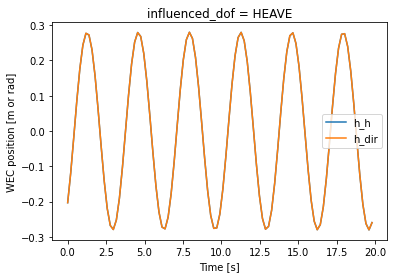

In [24]:
# WEC Position - Heave

results_h_0["wec_tdom"]["pos"].sel(influenced_dof="HEAVE").plot(label='h_h')
results_h_dir["wec_tdom"]["pos"].sel(influenced_dof="HEAVE").plot(label='h_dir')


plt.legend()

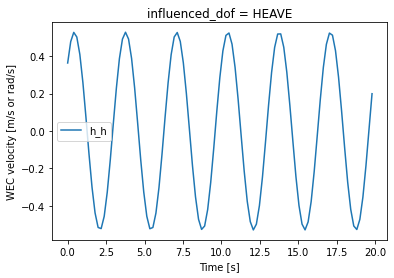

In [19]:
# WEC Velocity - Heave
# results_sh_sh["wec_tdom"]["vel"].sel(influenced_dof="HEAVE").plot(label='sh_sh')
# results_sh_h["wec_tdom"]["vel"].sel(influenced_dof="HEAVE").plot(label='sh_h')
results_h_0["wec_tdom"]["vel"].sel(influenced_dof="HEAVE").plot(label='h_h')
plt.legend()

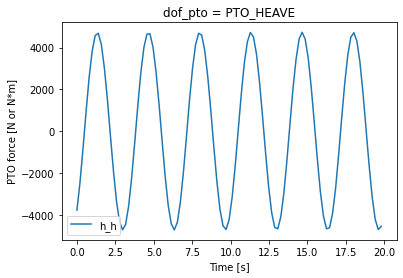

In [21]:
# PTO Force - Heave
# results_sh_sh["pto_tdom"]["force"].sel(dof_pto="PTO_HEAVE").plot(label='sh_sh')
# results_sh_h["pto_tdom"]["force"].sel(dof_pto="PTO_HEAVE").plot(label='sh_h')
results_h_0["pto_tdom"]["force"].sel(dof_pto="PTO_HEAVE").plot(label='h_h')
plt.legend()

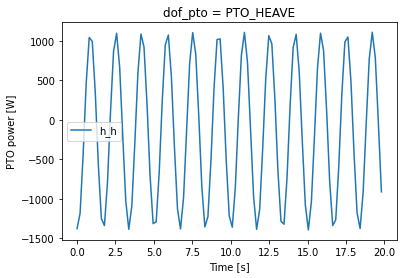

In [23]:
# PTO Power - Heave
# results_sh_sh["pto_tdom"]["power"].sel(dof_pto="PTO_HEAVE").plot(label='sh_sh')
# results_sh_h["pto_tdom"]["power"].sel(dof_pto="PTO_HEAVE").plot(label='sh_h')
results_h_0["pto_tdom"]["power"].sel(dof_pto="PTO_HEAVE").plot(label='h_h')
plt.legend()